In [ ]:
# Weights description:
# model_advanced_weights_1.h5 - training with ADAM optimizer on 60% of the dataset without augmentation

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
from cooltools.lib.numutils import set_diag

from models import simple_1d_cnn
from models import advanced_2d_cnn

In [14]:
# the following directive activates inline plotting
%matplotlib inline

# allow to allocate resources for model training
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True

In [15]:
from tensorflow.keras.backend import set_session
sess = tf.Session(config=config)
set_session(sess)

In [ ]:
######################### 
# UTIL FUNCTIONS
#########################

In [16]:
def plot_hic(matrix, use_log_scale = False, chromosome_position = ()):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    if use_log_scale:
        im = ax.matshow(np.log10(matrix), cmap='YlOrRd')
        fig.colorbar(im)
    else:
        im = ax.matshow(matrix, cmap='YlOrRd')
        fig.colorbar(im)
    
    if len(chromosome_position) != 0:
        ax.set_title(f"{chromosome_position[0]}: {chromosome_position[1][0]}-{chromosome_position[1][1]}", fontsize=25)

In [21]:
def from_upper_triu(vector_repr, matrix_len = 512, num_diags = 2):
    z = np.zeros((matrix_len,matrix_len))
    triu_tup = np.triu_indices(matrix_len,num_diags)
    z[triu_tup] = vector_repr[0, :, 0]
    for i in range(-num_diags+1,num_diags):
        set_diag(z, np.nan, i)
    return z + z.T

In [ ]:
######################### 
# Simple 1D CNN Model
#########################

In [ ]:
# TODO

In [ ]:
######################### 
# Advanced 2D CNN Model
#########################

In [7]:
advanced_model = advanced_2d_cnn.Model().get_model()

In [17]:
advanced_model.load_weights("./weights/model_advanced_weights_1.h5")

In [ ]:
######################### 
# Predictions
#########################

In [20]:
test_x = np.load("./train_test_data/test_x.npz")["arr_0"]
test_y = np.load("./train_test_data/test_y.npz")["arr_0"]

In [57]:
# Pick a random region to predict from the test set
regions_to_predict = random.sample(range(0, len(test_x)), 1)

In [58]:
prediction1 = advanced_model.predict(test_x[regions_to_predict[0], :].reshape(1, 524288, 4))

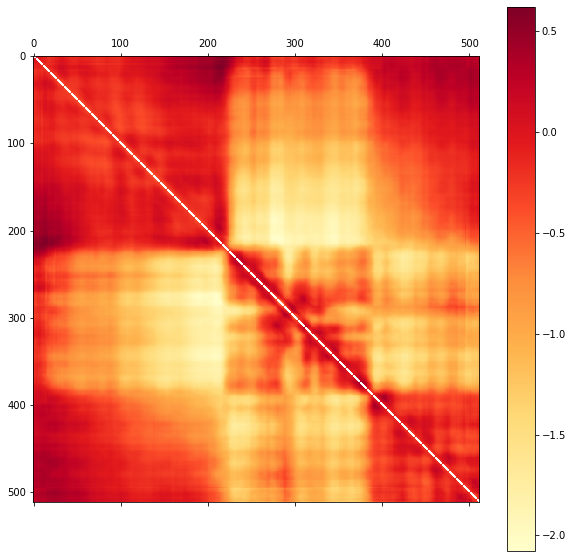

In [59]:
plot_hic(from_upper_triu(prediction1))

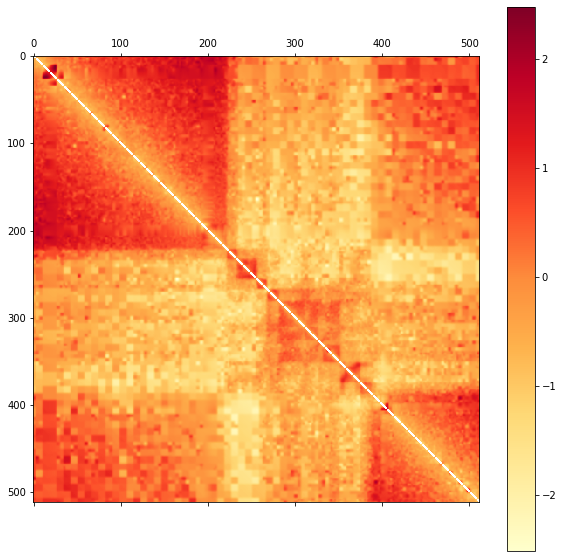

In [60]:
plot_hic(from_upper_triu(test_y[regions_to_predict[0], :].reshape(1, 130305, 1)))

In [ ]:
# compare predicted and test_y
# after that do this for train and calculate rmse and r^2

In [ ]:
# TODO: RMSE, R^2 here
# TODO: compare with simple model
# TODO: compare with fine-tuned human model (this model is not trained yet)
# TODO: Try more training iterations for advanced model (watch train/test performance)
# TODO: make a dict containing #index of sampe from the training or test set -> Chr and position in this chrom (this will be useful for illustration purposes)